In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

## Non tongue roll train data

In [2]:
# input the nonroll_train data
nonroll_train_path = '/Downloads/bioinformatics/bioinformatics/tongue/Non-roller/1.txt_and_59_files.csv/1.txt_and_59_files.variant.csv'
nonroll_train = pd.read_csv(nonroll_train_path, skiprows=24, header= None)

In [3]:
# get the number of SNPs in the nonroll_train
non_roll_snp = list(nonroll_train[14])
len(non_roll_snp)

984851

In [4]:
# snp_list = ['rs1761667', 'rs1527483', 'rs3211931',
#             'rs10499859', 'rs13438282','rs1358337', 'rs1054516',
#            'rs1049654', 'rs3211909', 'rs3211849', 'rs3211913', 'rs13246513', 'rs3173798',
#            'rs3211870', 'rs3211842', 'rs9784998', 'rs3211868', 'rs307355', 
#            'rs35744813',
#            'rs34160967', 'rs307377', 
#            'rs2107028', 'rs4245926', 'rs16909859',
#             'rs3204145', 'rs3814', 'rs2292927',]
# table = {'rs1761667':[0]*180, 'rs1527483':[0]*180, 'rs3211931':[0]*180,
#          'rs10499859':[0]*180, 'rs13438282':[0]*180,'rs1358337':[0]*180, 'rs1054516':[0]*180,
#          'rs1049654':[0]*180, 'rs3211909':[0]*180, 'rs3211849':[0]*180, 'rs3211913':[0]*180, 'rs13246513':[0]*180, 'rs3173798':[0]*180,
#          'rs3211870':[0]*180, 'rs3211842':[0]*180, 'rs9784998':[0]*180, 'rs3211868':[0]*180, 'rs307355':[0]*180, 
#          'rs35744813':[0]*180, 
#          'rs34160967':[0]*180, 'rs307377':[0]*180,
#          'rs2107028':[0]*180, 'rs4245926':[0]*180, 'rs16909859':[0]*180,
#          'rs3204145':[0]*180, 'rs3814':[0]*180, 'rs2292927':[0]*180,
#          'phenotype':['roll']*180}
# table_2 = {'SNP ID': snp_list, 'Position': [0]*len(snp_list), 'Chrmosome':['chr']*len(snp_list), 'SNP':['No']*len(snp_list)}

In [20]:
snp_list = ['rs515071','rs516946','rs3211931','rs1358337','rs34160967','rs4245926','rs3204145','rs3814',
              'rs219320', 'rs1758743', 'rs2834778', 'rs7173511', 'rs1934709', 'rs10058233',
                'rs728727', 'rs1416819', 'rs4856091', 'rs431389', 'rs1702401', 'rs213669',
           'rs4069666', 'rs7288551', 'rs6507199', 'rs260559', 'rs7859743', 'rs913767', 'rs3893199',
            'rs16911180', 'rs1724630', 'rs2733832', 'rs16891982']



table = {}

for snp_id in snp_list:
    table[snp_id] = [0]*180

table['phenotype'] = ['roll']*180

table_2 = {'SNP ID': snp_list, 'Position': [0]*len(snp_list), 'Chrmosome':['chr']*len(snp_list), 'ref_base':['No']*len(snp_list), 'alt_base':['No']*len(snp_list)}

In [23]:
df_2 = pd.DataFrame(table_2)
df_2

,SNP ID,Position,Chrmosome,ref_base,alt_base
0,rs515071,41661944,chr8,A,G
1,rs516946,41661730,chr8,T,C
2,rs3211931,80668857,chr7,C,T
3,rs1358337,80659069,chr7,G,A
4,rs34160967,6575246,chr1,G,A
5,rs4245926,108046690,chr4,G,A
6,rs3204145,108889340,chr9,A,T
7,rs3814,53107934,chr19,T,C
8,rs219320,59973346,chr14,G,A
9,rs1758743,25281555,chr9,A,G


In [22]:
for i_2 in df_2['SNP ID']:
    for j_2 in non_roll_snp:
        if i_2 == j_2:
            table_2['Chrmosome'][table_2['SNP ID'].index(i_2)] = nonroll_train[1][non_roll_snp.index(i_2)]
            table_2['Position'][table_2['SNP ID'].index(i_2)] = nonroll_train[2][non_roll_snp.index(i_2)]
            table_2['ref_base'][table_2['SNP ID'].index(i_2)] = nonroll_train[3][non_roll_snp.index(i_2)]
            table_2['alt_base'][table_2['SNP ID'].index(i_2)] = nonroll_train[4][non_roll_snp.index(i_2)]

In [8]:
m = 0
for phe in table['phenotype']:
    if m < 59:
        m = m + 1
        table['phenotype'][m] = 'non_roll'

In [9]:
columns = []
for c in range(1,181):
    columns.append('{}.txt'.format(c))
df = pd.DataFrame(table, index= columns)


In [10]:
stat_nonroll = [0]*len(snp_list)
num_nonroll = 0
for j in snp_list:
    for i in non_roll_snp:
        if i == j:
            print(i, non_roll_snp.index(i),nonroll_train[12][non_roll_snp.index(i)],
                  nonroll_train[1][non_roll_snp.index(i)], nonroll_train[3][non_roll_snp.index(i)]+'->'+nonroll_train[4][non_roll_snp.index(i)])
            
            stat_nonroll[num_nonroll] = nonroll_train[12][non_roll_snp.index(i)]
            ls = nonroll_train[13][non_roll_snp.index(i)].split(';')
            hom_het = nonroll_train[17][non_roll_snp.index(i)].split(';')
            
            for txt in columns:
                df[j][txt] = nonroll_train[3][non_roll_snp.index(i)] + nonroll_train[3][non_roll_snp.index(i)]
            
            for k in ls:
                if hom_het[ls.index(k)] == 'hom':
                    df[j][k] = nonroll_train[4][non_roll_snp.index(i)] + nonroll_train[4][non_roll_snp.index(i)]
                elif hom_het[ls.index(k)] == 'het':
                    df[j][k] = nonroll_train[3][non_roll_snp.index(i)] + nonroll_train[4][non_roll_snp.index(i)]
            
            
                        
            
    num_nonroll = num_nonroll + 1

rs515071 629151 27 chr8 A->G


C:\Users\kjlya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kjlya\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\kjlya\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kjlya\Anaconda3\lib\site-packages\ipyker

rs516946 223380 25 chr8 T->C
rs3211931 700495 18 chr7 C->T
rs1358337 202827 20 chr7 G->A
rs34160967 459991 8 chr1 G->A
rs4245926 120500 27 chr4 G->A
rs3204145 253697 8 chr9 A->T
rs3814 424500 19 chr19 T->C
rs219320 354156 26 chr14 G->A
rs1758743 244373 29 chr9 A->G
rs2834778 440805 21 chr21 G->A
rs7173511 371862 27 chr15 C->T
rs1934709 16609 26 chr1 C->T
rs10058233 748064 15 chr5 T->C
rs728727 32310 21 chr1 C->T
rs1416819 827088 6 chr1 A->C
rs4856091 689656 14 chr3 C->A
rs431389 389270 18 chr16 T->C
rs1702401 722782 13 chr21 G->A
rs213669 454421 19 chrX G->A
rs4069666 561484 16 chr12 A->G
rs7288551 445339 39 chr22 T->C
rs6507199 677441 30 chr18 A->G
rs260559 103510 29 chr3 A->G
rs7859743 256112 26 chr9 A->G
rs913767 256243 25 chr9 A->C
rs3893199 774114 22 chr9 G->T
rs16911180 781289 15 chr9 T->C
rs1724630 367180 30 chr15 G->C
rs2733832 535650 45 chr9 C->T
rs16891982 502512 54 chr5 C->G


In [11]:
stat_nonroll_rate = [i/60 for i in stat_nonroll]
stat_nonroll_rate

[0.45,
 0.4166666666666667,
 0.3,
 0.3333333333333333,
 0.13333333333333333,
 0.45,
 0.13333333333333333,
 0.31666666666666665,
 0.43333333333333335,
 0.48333333333333334,
 0.35,
 0.45,
 0.43333333333333335,
 0.25,
 0.35,
 0.1,
 0.23333333333333334,
 0.3,
 0.21666666666666667,
 0.31666666666666665,
 0.26666666666666666,
 0.65,
 0.5,
 0.48333333333333334,
 0.43333333333333335,
 0.4166666666666667,
 0.36666666666666664,
 0.25,
 0.5,
 0.75,
 0.9]

## Tongue non-roll train data 

In [12]:
roll_train_path = '/Downloads/bioinformatics/bioinformatics/tongue/Tongue-roller/61.txt_and_119_files.csv/61.txt_and_119_files.variant.csv'

roll_train = pd.read_csv(roll_train_path, skiprows=24, header= None)

In [13]:
roll_snp = list(roll_train[14])

In [14]:
stat_roll = [0]*len(snp_list)
num_roll = 0
for j in snp_list:
    for i in roll_snp:
        if i == j:
            print(i, roll_snp.index(i),roll_train[12][roll_snp.index(i)])
            stat_roll[num_roll] = roll_train[12][roll_snp.index(i)]
            ls_2 = roll_train[13][roll_snp.index(i)].split(';')
            hom_het = roll_train[17][roll_snp.index(i)].split(';')
            
            
            for k in ls_2:
                if hom_het[ls_2.index(k)] == 'hom':
                    df[j][k] = roll_train[4][roll_snp.index(i)] + roll_train[4][roll_snp.index(i)]
                elif hom_het[ls_2.index(k)] == 'het':
                    df[j][k] = roll_train[3][roll_snp.index(i)] + roll_train[4][roll_snp.index(i)]
            
            
    num_roll = num_roll + 1

rs515071 77776 22
rs516946 77775 80
rs3211931 70569 63
rs1358337 335399 62
rs34160967 683097 27
rs4245926 264713 87
rs3204145 379815 35
rs3814 528098 67
rs219320 468050 86
rs1758743 371942 92
rs2834778 742753 55
rs7173511 483086 79
rs1934709 174712 88
rs10058233 284233 63
rs728727 188511 70
rs1416819 163543 34
rs4856091 238568 54
rs431389 498208 70
rs1702401 677035 41
rs213669 784982 64
rs4069666 646641 46
rs7288551 545800 94
rs6507199 738308 42
rs260559 249958 92
rs7859743 381907 82
rs913767 382024 78
rs3893199 915652 28
rs16911180 382104 42
rs1724630 479073 45
rs2733832 716010 98
rs16891982 47710 114


In [15]:
stat_roll_rate = [i/120 for i in stat_roll]
stat_roll_rate

[0.18333333333333332,
 0.6666666666666666,
 0.525,
 0.5166666666666667,
 0.225,
 0.725,
 0.2916666666666667,
 0.5583333333333333,
 0.7166666666666667,
 0.7666666666666667,
 0.4583333333333333,
 0.6583333333333333,
 0.7333333333333333,
 0.525,
 0.5833333333333334,
 0.2833333333333333,
 0.45,
 0.5833333333333334,
 0.3416666666666667,
 0.5333333333333333,
 0.38333333333333336,
 0.7833333333333333,
 0.35,
 0.7666666666666667,
 0.6833333333333333,
 0.65,
 0.23333333333333334,
 0.35,
 0.375,
 0.8166666666666667,
 0.95]

In [18]:
df

,rs515071,rs516946,rs3211931,rs1358337,rs34160967,rs4245926,rs3204145,rs3814,rs219320,rs1758743,...,rs6507199,rs260559,rs7859743,rs913767,rs3893199,rs16911180,rs1724630,rs2733832,rs16891982,phenotype
1.txt,AA,CC,CC,GA,GG,GA,TT,TC,GA,GG,...,AA,GG,GG,CC,GG,TT,CC,CC,CC,roll
2.txt,AA,TT,CC,GG,GA,AA,AA,TC,AA,GG,...,AA,GG,AG,AC,GG,TT,GC,CT,GG,non_roll
3.txt,GG,TT,CC,GG,GG,GG,AA,TT,GG,AA,...,AA,AA,AA,AA,GG,TT,GC,CT,GG,non_roll
4.txt,GG,TT,CC,GG,GG,GG,AA,TT,GG,AA,...,AG,AA,AA,AA,GG,TT,GC,CT,GG,non_roll
5.txt,AA,TC,CT,GA,GG,AA,AA,TT,AA,GG,...,AA,AG,GG,AC,GG,TT,CC,CT,GG,non_roll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176.txt,GG,TT,CC,GG,GA,GG,AA,TT,GG,AA,...,AG,AA,AA,AA,TT,TC,GG,TT,GG,roll
177.txt,AA,TT,CC,GG,GG,GG,AA,TT,GG,AA,...,AA,AA,AA,AA,GG,CC,CC,CC,GG,roll
178.txt,AA,TT,CC,GG,GG,GG,AA,TT,GG,AA,...,AA,AA,AA,AA,GG,TC,CC,CC,GG,roll
179.txt,GG,TT,CC,GG,GG,GG,AA,TT,GG,AA,...,AA,AA,AA,AA,GT,TT,GG,TT,CG,roll


In [16]:
df.to_csv('/Downloads/mygit/similar_pic_seach/data.csv')

## Plot Visualization

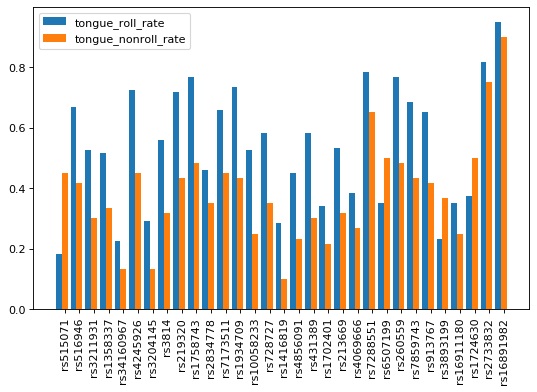

In [17]:
fig,ax = plt.subplots(figsize=(8,5),dpi=80)
width_1 = 0.4

ax.bar(np.arange(len(stat_roll_rate)),stat_roll_rate,width=width_1,tick_label=snp_list,label = "tongue_roll_rate")

ax.bar(np.arange(len(stat_nonroll_rate))+width_1,stat_nonroll_rate,width=width_1,tick_label=snp_list,label="tongue_nonroll_rate")

plt.xticks(rotation=90)
ax.legend()
plt.savefig("visul.png", bbox_inches = 'tight', dpi = 300)
plt.show()